In [465]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
from scipy.io import arff
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold

In [466]:
data, meta = arff.loadarff(r"C:\Users\MSI\Downloads\autism+screening+adult\Autism-Adult-Data.arff")
df = pd.DataFrame(data)

In [467]:
df.shape

(704, 21)

In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    object 
 1   A2_Score         704 non-null    object 
 2   A3_Score         704 non-null    object 
 3   A4_Score         704 non-null    object 
 4   A5_Score         704 non-null    object 
 5   A6_Score         704 non-null    object 
 6   A7_Score         704 non-null    object 
 7   A8_Score         704 non-null    object 
 8   A9_Score         704 non-null    object 
 9   A10_Score        704 non-null    object 
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [469]:
df["age"] = pd.to_numeric(df["age"], errors='coerce').fillna(0).astype(int)

In [470]:
df["A1_Score"] = pd.to_numeric(df["A1_Score"], errors='coerce').fillna(0).astype(int)

In [471]:
df["A2_Score"] = pd.to_numeric(df["A2_Score"], errors='coerce').fillna(0).astype(int)

In [472]:
df["A3_Score"] = pd.to_numeric(df["A3_Score"], errors='coerce').fillna(0).astype(int)

In [473]:
df["A4_Score"] = pd.to_numeric(df["A4_Score"], errors='coerce').fillna(0).astype(int)

In [474]:
df["A5_Score"] = pd.to_numeric(df["A5_Score"], errors='coerce').fillna(0).astype(int)

In [475]:
df["A6_Score"] = pd.to_numeric(df["A6_Score"], errors='coerce').fillna(0).astype(int)

In [476]:
df["A7_Score"] = pd.to_numeric(df["A7_Score"], errors='coerce').fillna(0).astype(int)

In [477]:
df["A8_Score"] = pd.to_numeric(df["A8_Score"], errors='coerce').fillna(0).astype(int)

In [478]:
df["A9_Score"] = pd.to_numeric(df["A9_Score"], errors='coerce').fillna(0).astype(int)

In [479]:
df["A10_Score"] = pd.to_numeric(df["A10_Score"], errors='coerce').fillna(0).astype(int)

In [480]:
for col in df.columns :
  numerical_features = ["ID", "age", "result"]
  if col not in numerical_features :
    print(col, df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [1 0]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [1 0]
--------------------------------------------------
A5_Score [0 1]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [1 0]
--------------------------------------------------
A9_Score [0 1]
--------------------------------------------------
A10_Score [0 1]
--------------------------------------------------
gender [b'f' b'm']
--------------------------------------------------
ethnicity [b'White-European' b'Latino' b'?' b'Others' b'Black' b'Asian'
 b'Middle Eastern ' b'Pasifika' b'South Asian' b'Hispanic' b'Turkish'
 b'others']
--------------------------------------------------
jundice [b'no' b'yes']
-----------------------------------------

In [481]:
df["gender"].unique()

array([b'f', b'm'], dtype=object)

In [482]:
mapping = {b'f': 'f', b'm': 'm'}
df['gender'] = df['gender'].map(mapping)

In [483]:
mapping = {b'yes': 'yes', b'no': 'no'}
df['jundice'] = df['jundice'].map(mapping)

In [484]:
mapping = {b'yes': 'yes', b'no': 'no'}
df['austim'] = df['austim'].map(mapping)

In [485]:
mapping = {b'18 and more': '18 and more'}
df['age_desc'] = df['age_desc'].map(mapping)


In [486]:
mapping = {b'yes': 'yes', b'no': 'no'}
df['used_app_before'] = df['used_app_before'].map(mapping)

In [487]:
mapping = {
    b'United States': 'United States',
    b'Brazil': 'Brazil',
    b'Spain': 'Spain',
    b'Egypt': 'Egypt',
    b'New Zealand': 'New Zealand',
    b'Bahamas': 'Bahamas',
    b'Burundi': 'Burundi',
    b'Austria': 'Austria',
    b'Argentina': 'Argentina',
    b'Jordan': 'Jordan',
    b'Ireland': 'Ireland',
    b'United Arab Emirates': 'United Arab Emirates',
    b'Afghanistan': 'Afghanistan',
    b'Lebanon': 'Lebanon',
    b'United Kingdom': 'United Kingdom',
    b'South Africa': 'South Africa',
    b'Italy': 'Italy',
    b'Pakistan': 'Pakistan',
    b'Bangladesh': 'Bangladesh',
    b'Chile': 'Chile',
    b'France': 'France',
    b'China': 'China',
    b'Australia': 'Australia',
    b'Canada': 'Canada',
    b'Saudi Arabia': 'Saudi Arabia',
    b'Netherlands': 'Netherlands',
    b'Romania': 'Romania',
    b'Sweden': 'Sweden',
    b'Tonga': 'Tonga',
    b'Oman': 'Oman',
    b'India': 'India',
    b'Philippines': 'Philippines',
    b'Sri Lanka': 'Sri Lanka',
    b'Sierra Leone': 'Sierra Leone',
    b'Ethiopia': 'Ethiopia',
    b'Viet Nam': 'Viet Nam',
    b'Iran': 'Iran',
    b'Costa Rica': 'Costa Rica',
    b'Germany': 'Germany',
    b'Mexico': 'Mexico',
    b'Russia': 'Russia',
    b'Armenia': 'Armenia',
    b'Iceland': 'Iceland',
    b'Nicaragua': 'Nicaragua',
    b'Hong Kong': 'Hong Kong',
    b'Japan': 'Japan',
    b'Ukraine': 'Ukraine',
    b'Kazakhstan': 'Kazakhstan',
    b'AmericanSamoa': 'AmericanSamoa',
    b'Uruguay': 'Uruguay',
    b'Serbia': 'Serbia',
    b'Portugal': 'Portugal',
    b'Malaysia': 'Malaysia',
    b'Ecuador': 'Ecuador',
    b'Niger': 'Niger',
    b'Belgium': 'Belgium',
    b'Bolivia': 'Bolivia',
    b'Aruba': 'Aruba',
    b'Finland': 'Finland',
    b'Turkey': 'Turkey',
    b'Nepal': 'Nepal',
    b'Indonesia': 'Indonesia',
    b'Angola': 'Angola',
    b'Azerbaijan': 'Azerbaijan',
    b'Iraq': 'Iraq',
    b'Czech Republic': 'Czech Republic',
    b'Cyprus': 'Cyprus'
}
df['contry_of_res'] = df['contry_of_res'].map(mapping)


In [488]:
relation_mapping = {
    b'Self': 'Self',
    b'Parent': 'Parent',
    b'?': 'Unknown',
    b'Health care professional': 'Health care professional',
    b'Relative': 'Relative',
    b'Others': 'Others'
}
class_mapping = {
    b'NO': 'No',
    b'YES': 'Yes'
}
df['relation'] = df['relation'].map(relation_mapping)
df['Class/ASD'] = df['Class/ASD'].map(class_mapping)


In [489]:
ethnicity_mapping = {
    b'White-European': 'White-European',
    b'Latino': 'Latino',
    b'?': '?',
    b'Others': 'Others',
    b'others': 'Others',
    b'Black': 'Black',
    b'Asian': 'Asian',
    b'Middle Eastern ': 'Middle Eastern',
    b'Pasifika': 'Pasifika',
    b'South Asian': 'South Asian',
    b'Hispanic': 'Hispanic',
    b'Turkish': 'Turkish'
}
df['ethnicity'] = df['ethnicity'].map(ethnicity_mapping)

In [490]:
for col in df.columns :
  numerical_features = ["ID", "age", "result"]
  if col not in numerical_features :
    print(col, df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [1 0]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [1 0]
--------------------------------------------------
A5_Score [0 1]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [1 0]
--------------------------------------------------
A9_Score [0 1]
--------------------------------------------------
A10_Score [0 1]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['White-European' 'Latino' '?' 'Others' 'Black' 'Asian' 'Middle Eastern'
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish']
--------------------------------------------------
jundice ['no' 'yes']
--------------------------------------------------
austim ['no' 'yes

In [491]:
df["Class/ASD"].value_counts()

Class/ASD
No     515
Yes    189
Name: count, dtype: int64

In [492]:
df.shape

(704, 21)

In [493]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [494]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,No
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,No
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,Yes
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,No
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,Unknown,No


In [495]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.613636,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.559686,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [496]:
import seaborn as sns

sns.set_theme(style="darkgrid")

Mean Age: 29.613636363636363
Median Age: 27.0


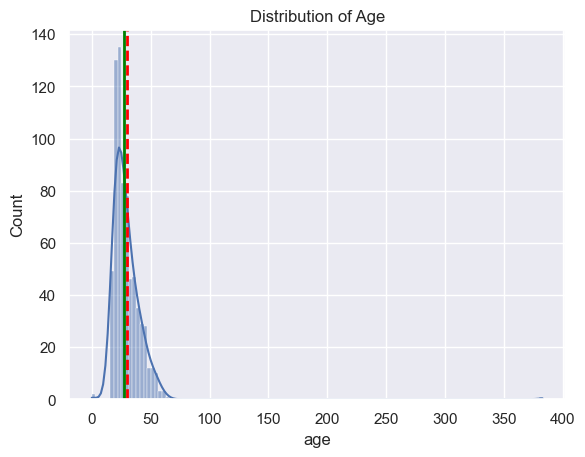

In [497]:
sns.histplot(df["age"], kde=True)
plt.title("Distribution of Age")

age_mean = df["age"].mean()
age_median = df["age"].median()

print("Mean Age:", age_mean)
print("Median Age:", age_median)

plt.axvline(age_mean, color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(age_median, color='green', linestyle='-', linewidth=2, label='Median')


plt.show()

Mean Age: 4.875
Median Age: 4.0


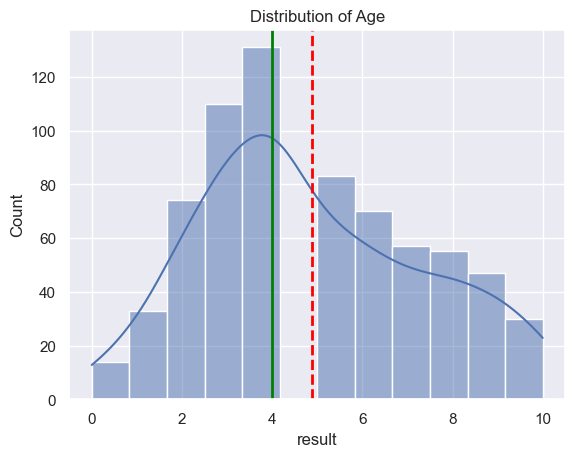

In [498]:
sns.histplot(df["result"], kde=True)
plt.title("Distribution of Age")

result_mean = df["result"].mean()
result_median = df["result"].median()

print("Mean Age:", result_mean)
print("Median Age:", result_median)

plt.axvline(result_mean, color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(result_median, color='green', linestyle='-', linewidth=2, label='Median')


plt.show()

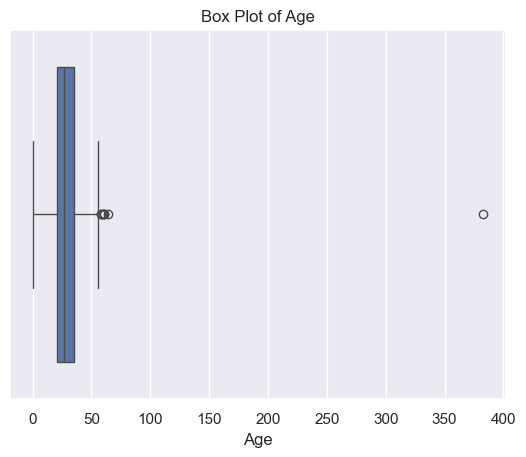

In [499]:
sns.boxplot(x = df["age"])
plt.title("Box Plot of Age")
plt.xlabel("Age")
plt.show()

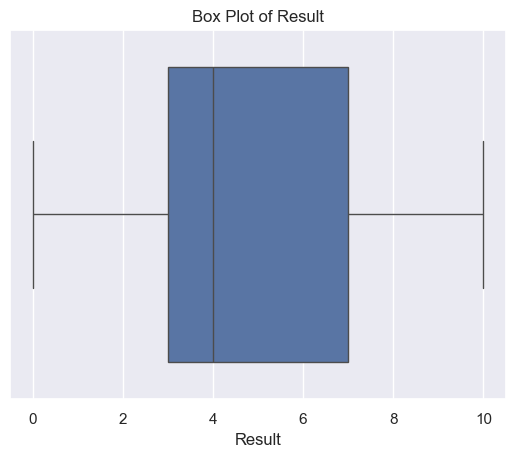

In [500]:
sns.boxplot(x = df["result"])
plt.title("Box Plot of Result")
plt.xlabel("Result")
plt.show()

In [501]:
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]

In [502]:
len(age_outliers)

8

In [503]:
Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers = df[(df["result"] < lower_bound) | (df["result"] > upper_bound)]

In [504]:
len(result_outliers)

0

In [505]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

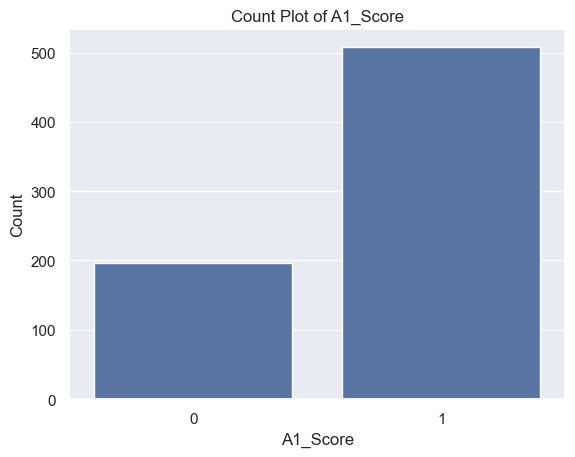

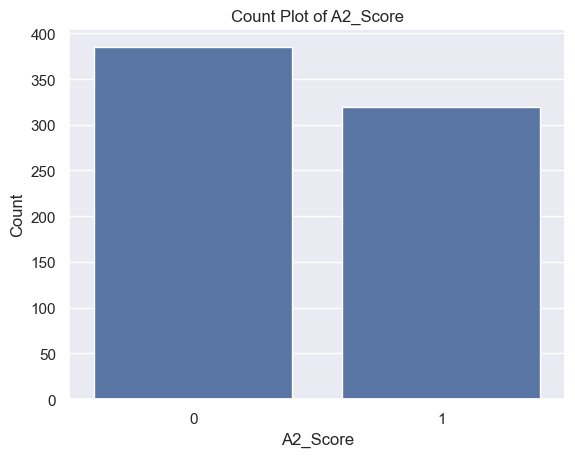

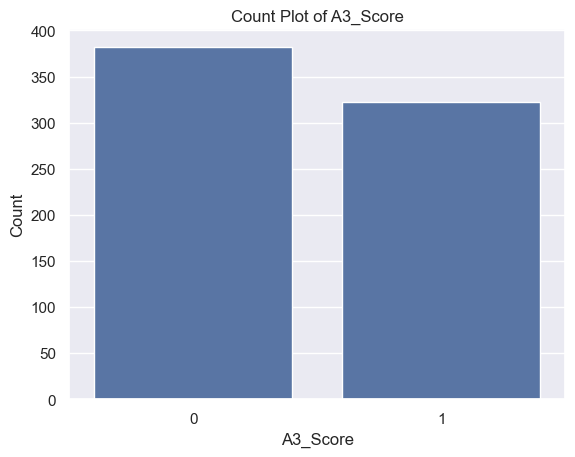

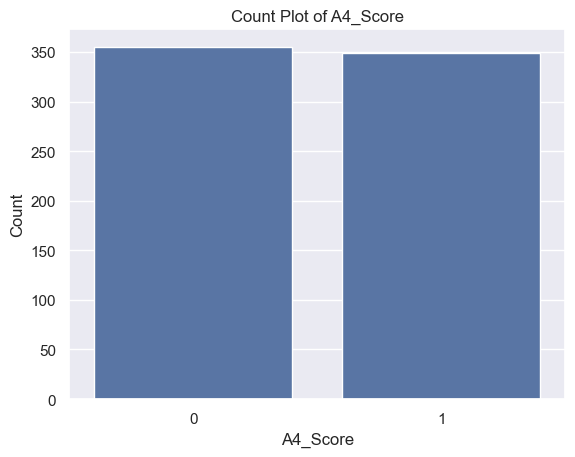

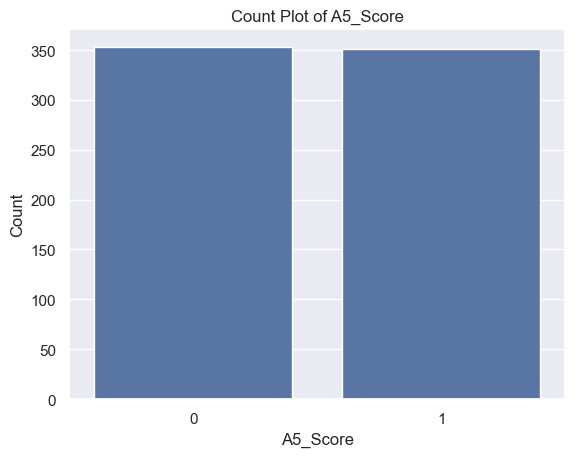

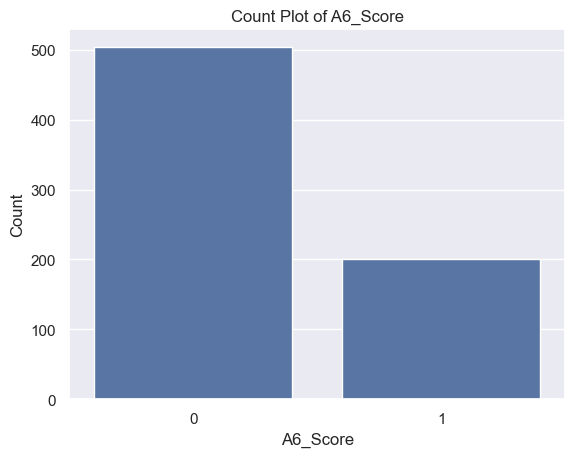

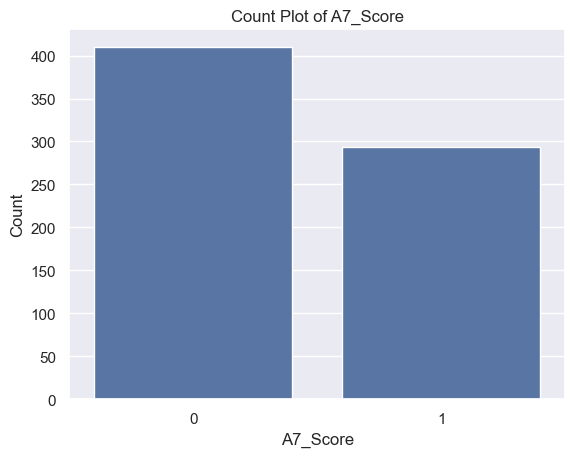

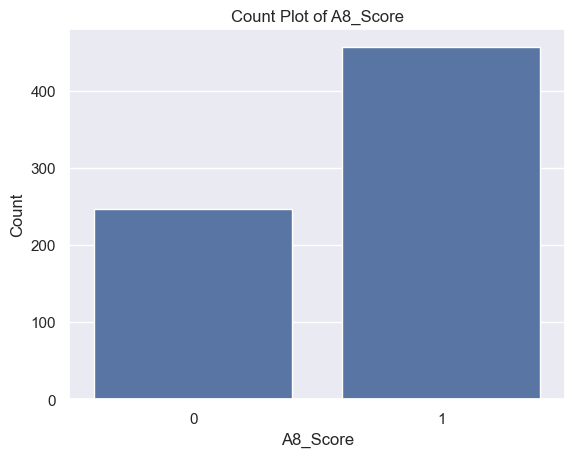

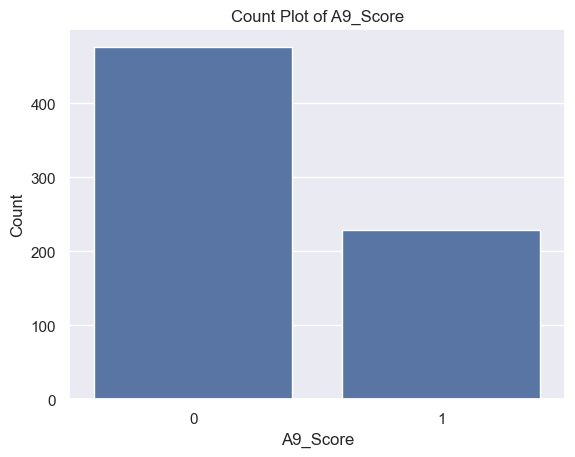

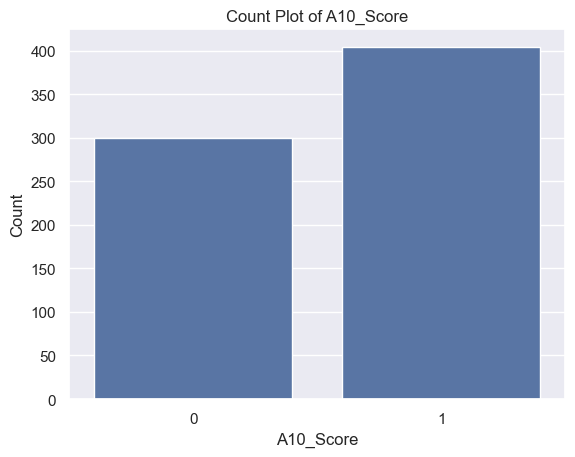

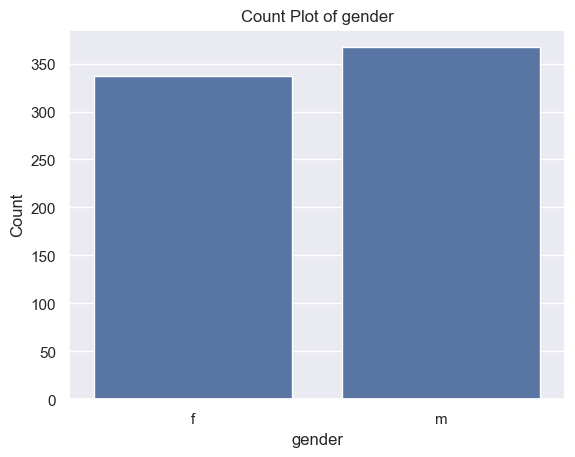

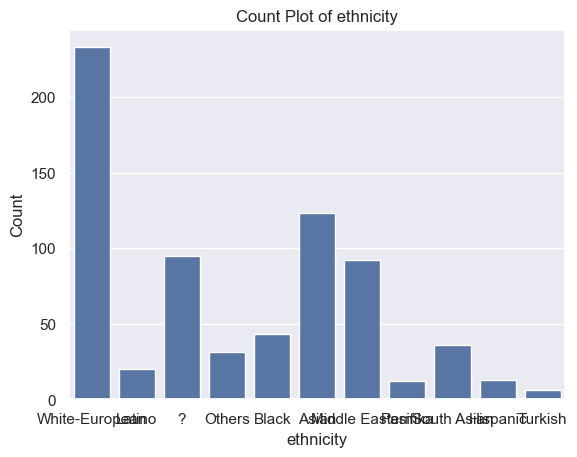

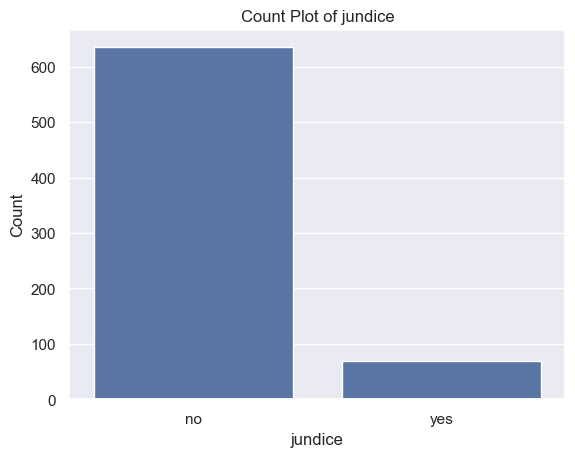

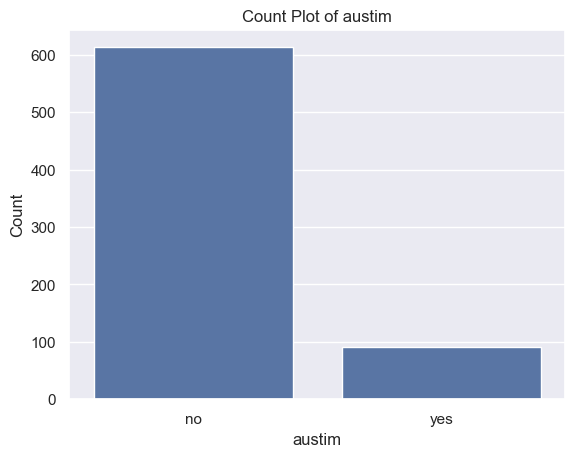

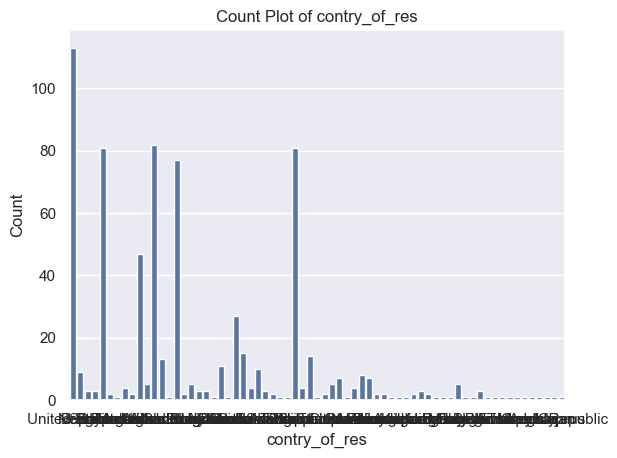

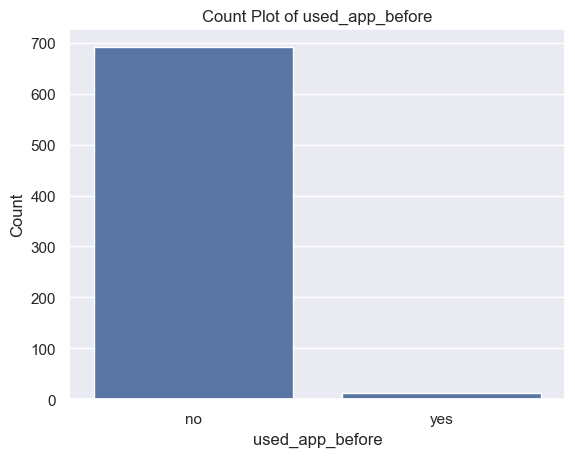

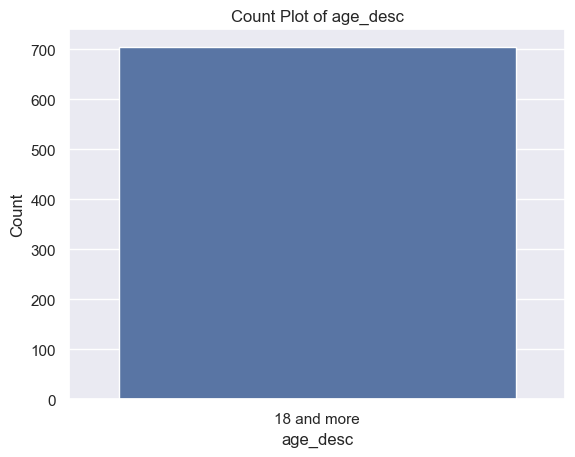

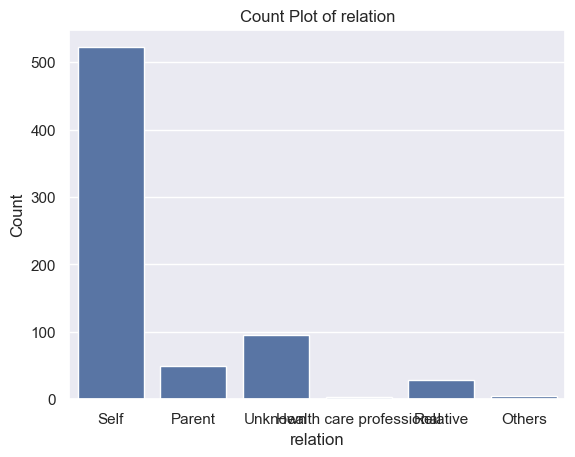

In [506]:
catagorical_colums = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']

for col in catagorical_colums :
  sns.countplot(x = df[col])
  plt.title(f"Count Plot of {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

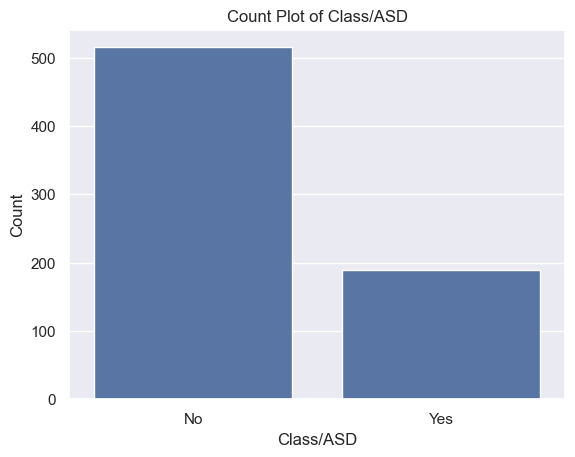

In [507]:
sns.countplot(x = df["Class/ASD"])
plt.title("Count Plot of Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [508]:
df["ethnicity"] = df["ethnicity"].replace({"?" : "Others", "others" : "Others"})

In [509]:
df["ethnicity"].unique()

array(['White-European', 'Latino', 'Others', 'Black', 'Asian',
       'Middle Eastern', 'Pasifika', 'South Asian', 'Hispanic', 'Turkish'],
      dtype=object)

In [510]:
df["relation"].unique()

array(['Self', 'Parent', 'Unknown', 'Health care professional',
       'Relative', 'Others'], dtype=object)

In [511]:
df["relation"] = df["relation"].replace({"Unknown" : "Others",
                                         "Parent" : "Others",
                                         "Health care professional" : "Others",
                                         "Relative" : "Others"})

In [512]:
object_columns = df.select_dtypes(include=['object']).columns

In [513]:
print(object_columns)

Index(['gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')


In [514]:
encoder = {}
for col in object_columns :
  label_encoder = LabelEncoder()
  df[col] = label_encoder.fit_transform(df[col])
  encoder[col] = label_encoder

with open("encoder.pkl", "wb") as f :
  pickle.dump(encoder, f)

In [515]:
df.drop('age_desc', axis=1, inplace=True)

In [516]:
encoder

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'age_desc': LabelEncoder(),
 'relation': LabelEncoder(),
 'Class/ASD': LabelEncoder()}

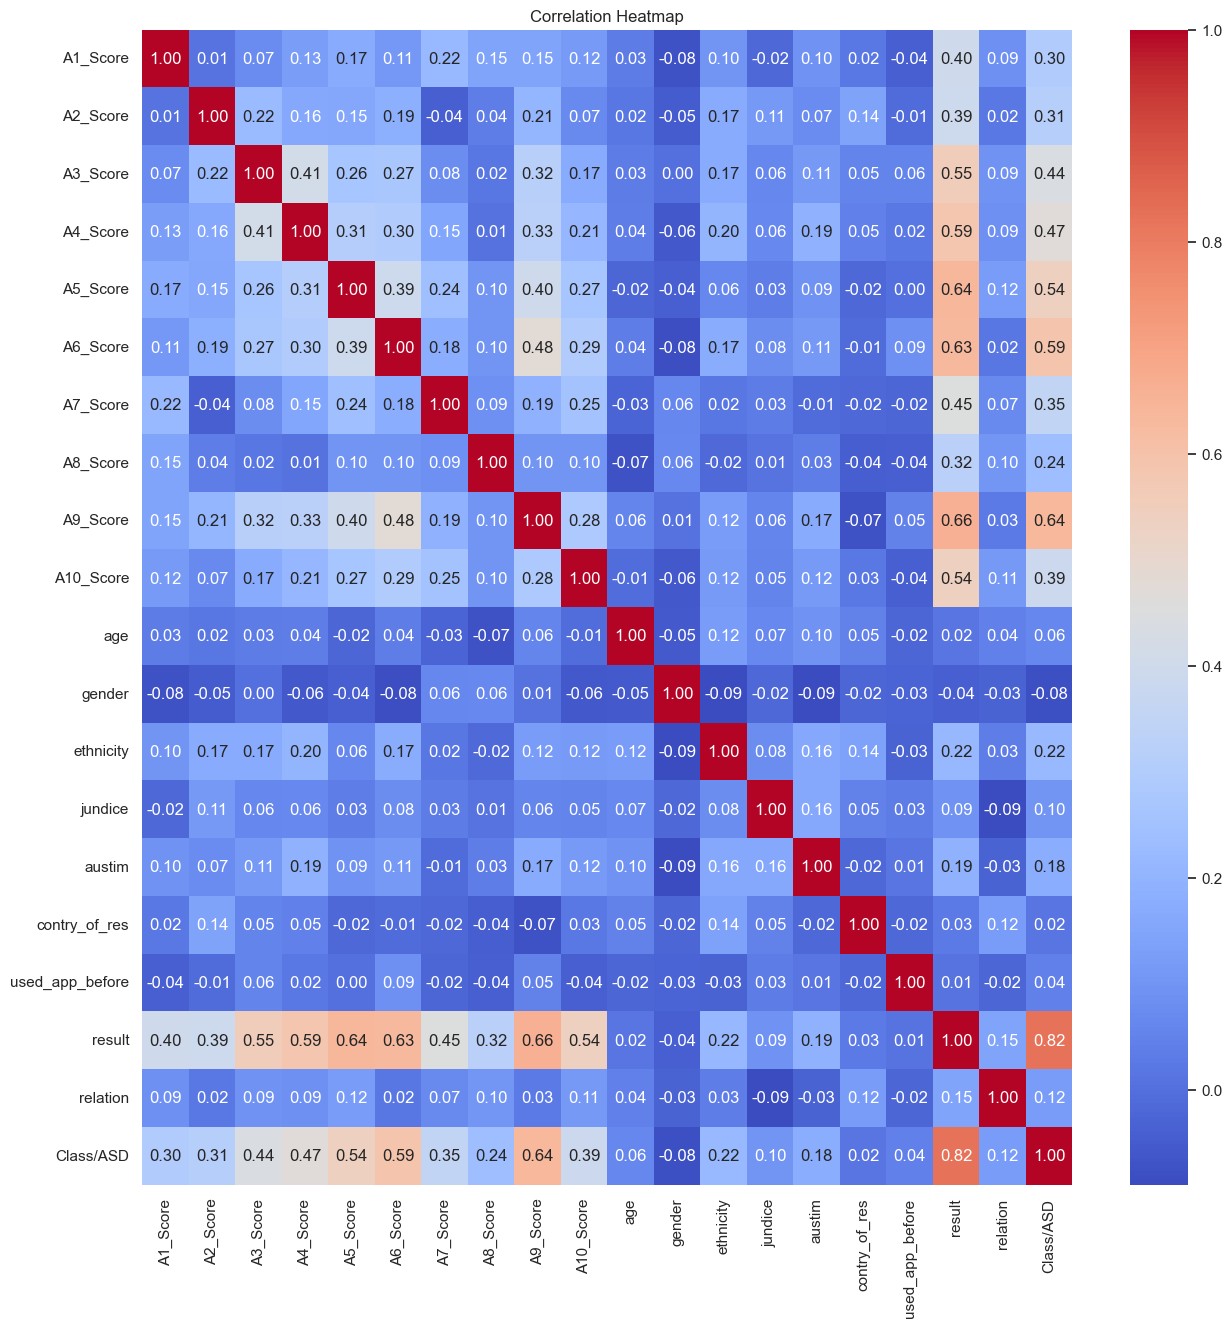

In [517]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [518]:
def replace_outliers_with_median(df, column) :
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  median = df[column].median()

  df[column] = df[column].apply(lambda x : median if x < lower_bound or x > upper_bound else x)

  return df


In [519]:
df = replace_outliers_with_median(df, "age")

df = replace_outliers_with_median(df, "result")

In [520]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,9,0,0,64,0,6.0,1,0
1,1,1,0,1,0,0,0,1,0,1,24.0,1,3,0,1,13,0,5.0,1,0
2,1,1,0,1,1,0,1,1,1,1,27.0,1,3,1,1,56,0,8.0,0,1
3,1,1,0,1,0,0,1,1,0,1,35.0,0,9,0,1,64,0,6.0,1,0
4,1,0,0,0,0,0,0,1,0,0,40.0,0,5,0,0,22,0,2.0,0,0


In [521]:
df.shape

(704, 20)

In [522]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [523]:
x = df.drop(columns=["Class/ASD"])
y = df["Class/ASD"]

In [524]:
print(x)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         1         1         1         0         0         1   
1           1         1         0         1         0         0         0   
2           1         1         0         1         1         0         1   
3           1         1         0         1         0         0         1   
4           1         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
699         0         1         0         1         1         0         1   
700         1         0         0         0         0         0         0   
701         1         0         1         1         1         0         1   
702         1         0         0         1         1         0         1   
703         1         0         1         1         1         0         1   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jundice  austi

In [525]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
699    1
700    0
701    1
702    0
703    1
Name: Class/ASD, Length: 704, dtype: int64


In [526]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [527]:
print(y_train.shape)
print(y_test.shape)

(563,)
(141,)


In [528]:
y_train.value_counts()

Class/ASD
0    410
1    153
Name: count, dtype: int64

In [529]:
y_test.value_counts()

Class/ASD
0    105
1     36
Name: count, dtype: int64

In [530]:
smote = SMOTE(random_state=42)

In [531]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [532]:
print(y_train_smote.value_counts())

Class/ASD
0    410
1    410
Name: count, dtype: int64


In [533]:
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)
svm_classifier = SVC(probability=True, random_state=42)
ann_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

ensemble_model = VotingClassifier(
    estimators=[
        ('dt', decision_tree),
        ('rf', random_forest),
        ('xgb', xgboost_classifier),
        ('svm', svm_classifier),
        ('ann', ann_classifier)
    ],
    voting='soft',
    n_jobs=-1
)

models = {
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "XGBoost": xgboost_classifier,
    "SVM": svm_classifier,
    "ANN": ann_classifier,
    "Ensemble": ensemble_model
}


In [534]:
cv_score = {}

print("Starting cross-validation for all models...\n")

for model_name, model in models.items():
    print(f"Training {model_name}...")
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy', n_jobs=-1)
    cv_score[model_name] = scores
    print(f"{model_name} - Mean Accuracy: {np.mean(scores):.4f}")
    print("-" * 50)

print("\nCross-validation Summary:")
for model_name, scores in cv_score.items():
    print(f"{model_name}: Mean Accuracy = {np.mean(scores):.4f}, Std = {np.std(scores):.4f}")


Starting cross-validation for all models...

Training Decision Tree...
Decision Tree - Mean Accuracy: 1.0000
--------------------------------------------------
Training Random Forest...
Random Forest - Mean Accuracy: 1.0000
--------------------------------------------------
Training XGBoost...
XGBoost - Mean Accuracy: 1.0000
--------------------------------------------------
Training SVM...
SVM - Mean Accuracy: 0.9537
--------------------------------------------------
Training ANN...
ANN - Mean Accuracy: 0.9610
--------------------------------------------------
Training Ensemble...
Ensemble - Mean Accuracy: 1.0000
--------------------------------------------------

Cross-validation Summary:
Decision Tree: Mean Accuracy = 1.0000, Std = 0.0000
Random Forest: Mean Accuracy = 1.0000, Std = 0.0000
XGBoost: Mean Accuracy = 1.0000, Std = 0.0000
SVM: Mean Accuracy = 0.9537, Std = 0.0213
ANN: Mean Accuracy = 0.9610, Std = 0.0220
Ensemble: Mean Accuracy = 1.0000, Std = 0.0000


In [535]:
cv_score

{'Decision Tree': array([1., 1., 1., 1., 1.]),
 'Random Forest': array([1., 1., 1., 1., 1.]),
 'XGBoost': array([1., 1., 1., 1., 1.]),
 'SVM': array([0.94512195, 0.93902439, 0.92682927, 0.97560976, 0.98170732]),
 'ANN': array([0.98170732, 0.92682927, 0.95121951, 0.98780488, 0.95731707]),
 'Ensemble': array([1., 1., 1., 1., 1.])}

In [536]:
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)
svm_classifier = SVC(probability=True, random_state=42)
ann_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

ensemble_model = VotingClassifier(
    estimators=[
        ('dt', decision_tree),
        ('rf', random_forest),
        ('xgb', xgboost_classifier),
        ('svm', svm_classifier),
        ('ann', ann_classifier)
    ],
    voting='soft', 
    n_jobs=-1
)

models = {
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "XGBoost": xgboost_classifier,
    "SVM": svm_classifier,
    "ANN": ann_classifier,
    "Ensemble": ensemble_model
}

In [537]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 50, 70],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 50, 70],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

param_grid_ann = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (150, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

param_grid_ensemble = {
    'voting': ['soft', 'hard'],
    'weights': [
        [1, 1, 1, 1, 1],       
        [2, 1, 1, 1, 1],        
        [1, 2, 1, 1, 1],      
        [1, 1, 2, 1, 1],        
        [1, 1, 1, 2, 1],       
        [1, 1, 1, 1, 2]        
    ]
}

In [538]:
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_grid_xgb, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search_svm = RandomizedSearchCV(estimator=svm_classifier, param_distributions=param_grid_svm, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search_ann = RandomizedSearchCV(estimator=ann_classifier, param_distributions=param_grid_ann, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search_ensemble = RandomizedSearchCV(estimator=ensemble_model,param_distributions=param_grid_ensemble,n_iter=10,cv=5,scoring='accuracy',random_state=42,n_jobs=-1)

In [539]:
random_search_dt.fit(X_train_smote, y_train_smote)
random_search_rf.fit(X_train_smote, y_train_smote)
random_search_xgb.fit(X_train_smote, y_train_smote)
random_search_svm.fit(X_train_smote, y_train_smote)
random_search_ann.fit(X_train_smote, y_train_smote)
random_search_ensemble.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=VotingClassifier(estimators=[('dt',
                                                           DecisionTreeClassifier(random_state=42)),
                                                          ('rf',
                                                           RandomForestClassifier(random_state=42)),
                                                          ('xgb',
                                                           XGBClassifier(base_score=None,
                                                                         booster=None,
                                                                         callbacks=None,
                                                                         colsample_bylevel=None,
                                                                         colsample_bynode=None,
                                                                         colsample_bytree=None,
                                                                         device=None,
                                                                         early_stopping_rounds=None,
                                                                         enable_categorical=Fal...
                                                                         n_estimators=None,
                                                                         n_jobs=None,
                                                                         num_parallel_tree=None, ...)),
                                                          ('svm',
                                                           SVC(probability=True,
                                                               random_state=42)),
                                                          ('ann',
                                                           MLPClassifier(max_iter=500,
                                                                         random_state=42))],
                                              n_jobs=-1, voting='soft'),
                   n_jobs=-1,
                   param_distributions={'voting': ['soft', 'hard'],
                                        'weights': [[1, 1, 1, 1, 1],
                                                    [2, 1, 1, 1, 1],
                                                    [1, 2, 1, 1, 1],
                                                    [1, 1, 2, 1, 1],
                                                    [1, 1, 1, 2, 1],
                                                    [1, 1, 1, 1, 2]]},
                   random_state=42, scoring='accuracy')

In [540]:
print("Best Decision Tree:", random_search_dt.best_estimator_)
print("Best DT Accuracy:", random_search_dt.best_score_)

print("Best Random Forest:", random_search_rf.best_estimator_)
print("Best RF Accuracy:", random_search_rf.best_score_)

print("Best XGBoost:", random_search_xgb.best_estimator_)
print("Best XGB Accuracy:", random_search_xgb.best_score_)

print("Best SVM:", random_search_svm.best_estimator_)
print("Best SVM Accuracy:", random_search_svm.best_score_)

print("Best ANN:", random_search_ann.best_estimator_)
print("Best ANN Accuracy:", random_search_ann.best_score_)

print("Best Ensemble Model:", random_search_ensemble.best_estimator_)
print("Best Ensemble Accuracy:", random_search_ensemble.best_score_)

Best Decision Tree: DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       min_samples_split=10, random_state=42)
Best DT Accuracy: 1.0
Best Random Forest: RandomForestClassifier(bootstrap=False, max_depth=70, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=50, random_state=42)
Best RF Accuracy: 1.0
Best XGBoost: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, mi

In [541]:
best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
    best_score = random_search_dt.best_score_
    best_model = random_search_dt.best_estimator_

if random_search_rf.best_score_ > best_score:
    best_score = random_search_rf.best_score_
    best_model = random_search_rf.best_estimator_

if random_search_xgb.best_score_ > best_score:
    best_score = random_search_xgb.best_score_
    best_model = random_search_xgb.best_estimator_

if random_search_svm.best_score_ > best_score:
    best_score = random_search_svm.best_score_
    best_model = random_search_svm.best_estimator_

if random_search_ann.best_score_ > best_score:
    best_score = random_search_ann.best_score_
    best_model = random_search_ann.best_estimator_

if random_search_ensemble.best_score_ > best_score:
    best_score = random_search_ensemble.best_score_
    best_model = random_search_ensemble.best_estimator_

print(f"Best model: {best_model}")
print(f"Best cross-validation accuracy: {best_score:.4f}")


Best model: DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       min_samples_split=10, random_state=42)
Best cross-validation accuracy: 1.0000


In [542]:
print(f"Best model : {best_model}")
print(f"Best cross-valiadtion Accuracy : {best_score}")

Best model : DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       min_samples_split=10, random_state=42)
Best cross-valiadtion Accuracy : 1.0


In [543]:
with open("best_model.pkl", "wb") as f :
  pickle.dump(best_model, f)

==== Evaluating Decision Tree ====

   Metric  Score
 Accuracy    1.0
Precision    1.0
   Recall    1.0
 F1 Score    1.0
      AUC    1.0


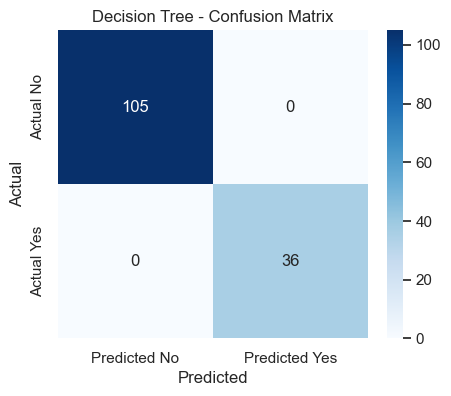

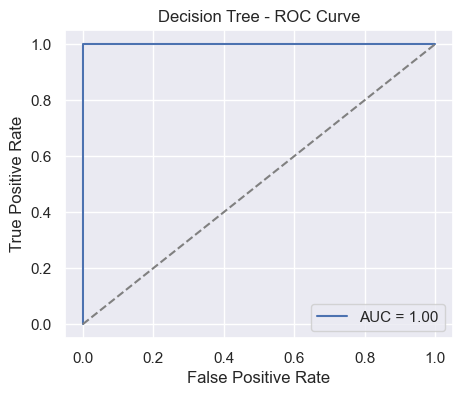

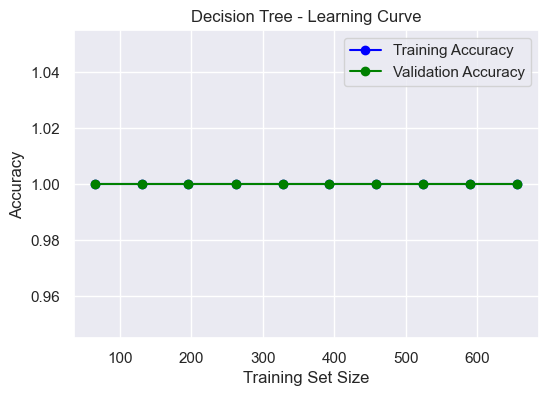




==== Evaluating Random Forest ====

   Metric  Score
 Accuracy    1.0
Precision    1.0
   Recall    1.0
 F1 Score    1.0
      AUC    1.0


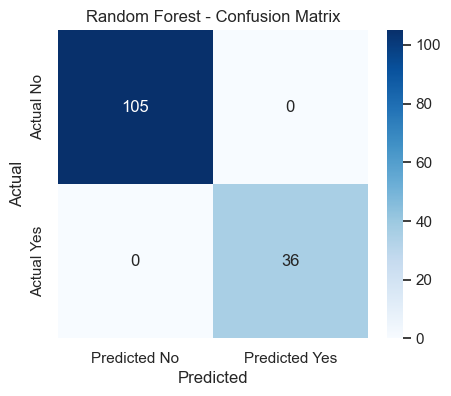

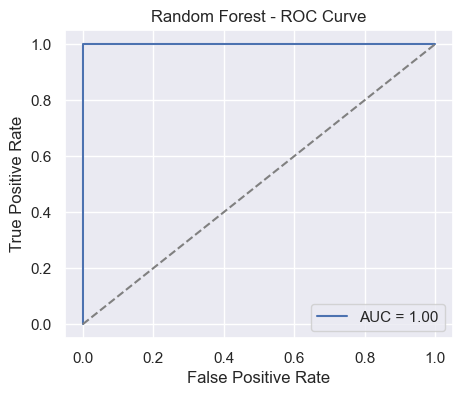

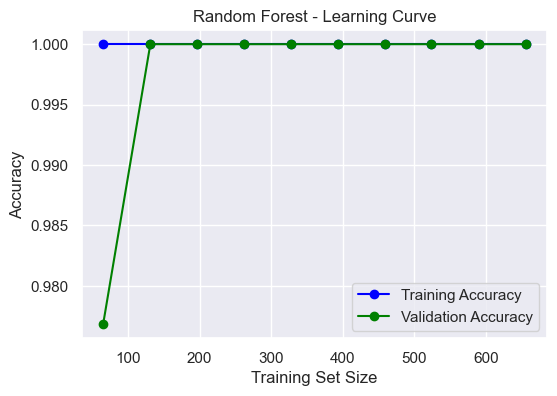




==== Evaluating XGBoost ====

   Metric  Score
 Accuracy    1.0
Precision    1.0
   Recall    1.0
 F1 Score    1.0
      AUC    1.0


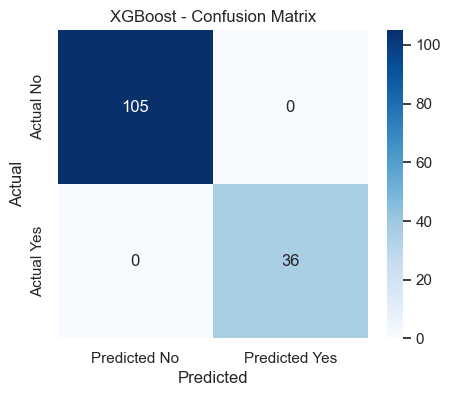

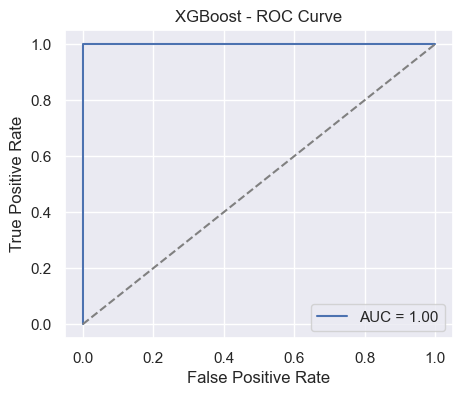

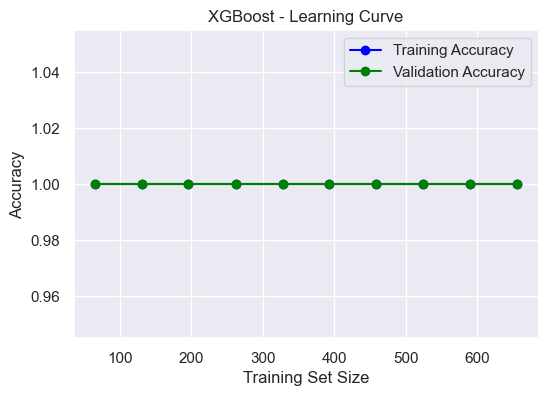




==== Evaluating SVM ====

   Metric  Score
 Accuracy    1.0
Precision    1.0
   Recall    1.0
 F1 Score    1.0
      AUC    1.0


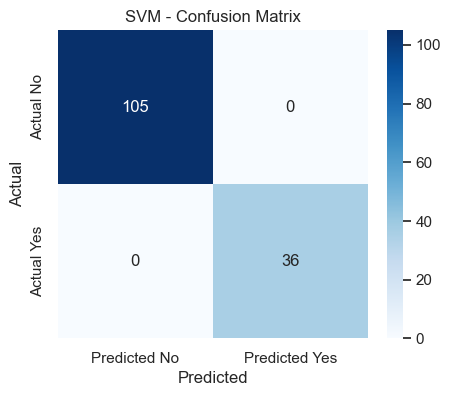

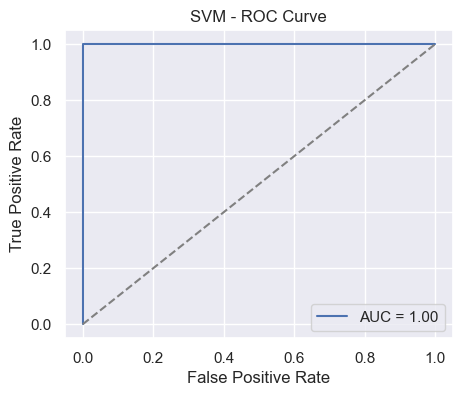

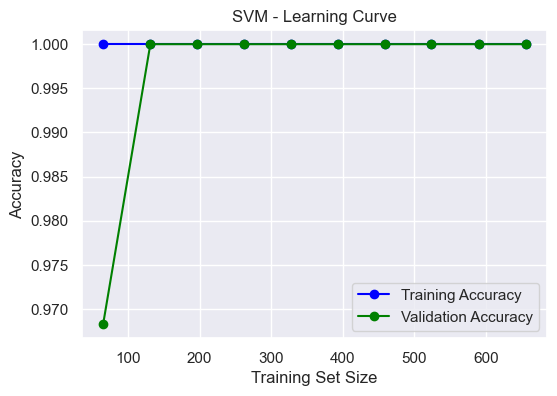




==== Evaluating ANN ====

   Metric    Score
 Accuracy 0.964539
Precision 0.918919
   Recall 0.944444
 F1 Score 0.931507
      AUC 0.997090


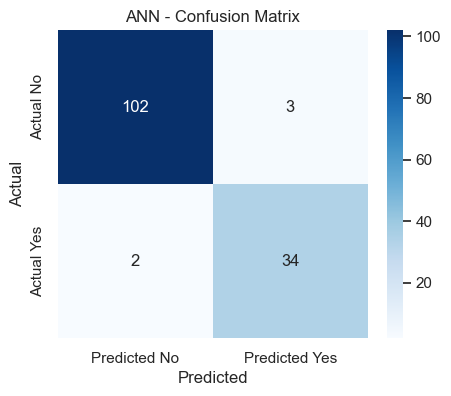

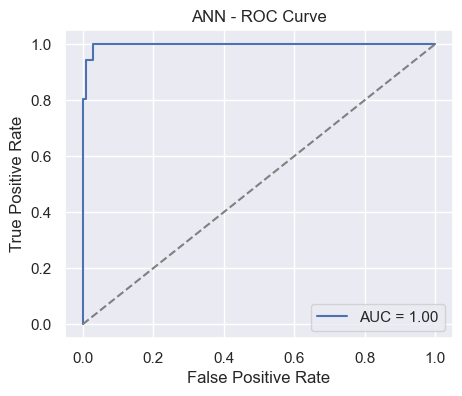

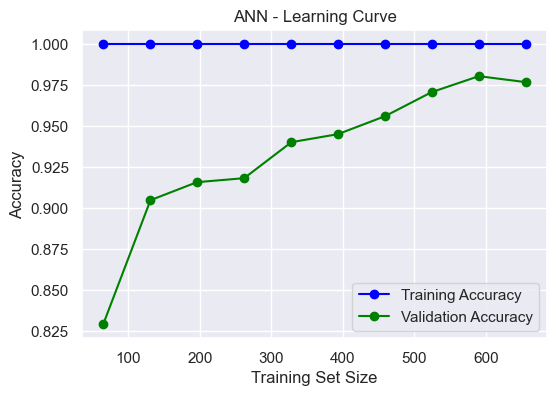




==== Evaluating Ensemble ====

   Metric  Score
 Accuracy    1.0
Precision    1.0
   Recall    1.0
 F1 Score    1.0
      AUC    NaN


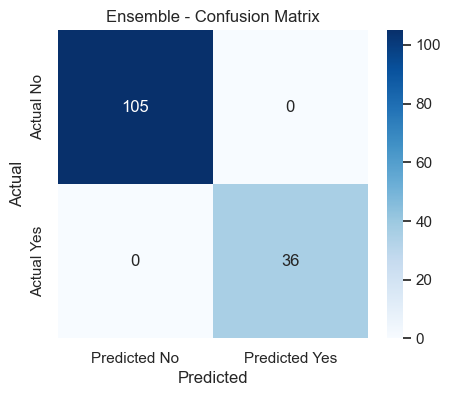

Ensemble does not support probability estimates for ROC curve.



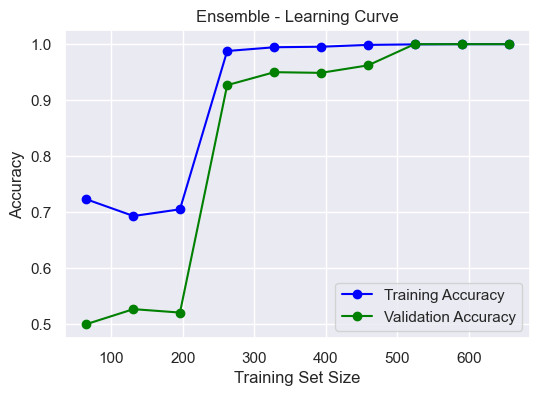

In [544]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
models = {
    "Decision Tree": random_search_dt.best_estimator_,
    "Random Forest": random_search_rf.best_estimator_,
    "XGBoost": random_search_xgb.best_estimator_,
    "SVM": random_search_svm.best_estimator_,
    "ANN": random_search_ann.best_estimator_,
    "Ensemble": random_search_ensemble.best_estimator_
}

for model_name, model in models.items():
    print(f"==== Evaluating {model_name} ====\n")
    
    y_pred = model.predict(X_test)
    
    y_proba = None
    if hasattr(model, "predict_proba") and hasattr(model, "voting") and model.voting == 'soft':
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        try:
            y_proba = model.decision_function(X_test)
        except:
            y_proba = None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else float('nan')
    
    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'],
        'Score': [accuracy, precision, recall, f1, auc]
    })
    print(metrics_df.to_string(index=False))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted No', 'Predicted Yes'],
                yticklabels=['Actual No', 'Actual Yes'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    if y_proba is not None and not np.isnan(auc):
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.figure(figsize=(5,4))
        plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
        plt.plot([0,1], [0,1], linestyle='--', color='grey')
        plt.title(f'{model_name} - ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.show()
    else:
        print(f"{model_name} does not support probability estimates for ROC curve.\n")
    
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train_smote, y_train_smote, cv=cv,
        scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )
    
    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    
    plt.figure(figsize=(6,4))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
    plt.plot(train_sizes, val_mean, 'o-', color='green', label='Validation Accuracy')
    plt.title(f'{model_name} - Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    print("\n\n")

In [545]:
y_test_pred = best_model.predict(X_test)
print("Accuracy scaore : ",accuracy_score(y_test, y_test_pred))
print("Confusion matrix : \n",confusion_matrix(y_test, y_test_pred))
print("classifiaction Report : \n",classification_report(y_test, y_test_pred))

Accuracy scaore :  1.0
Confusion matrix : 
 [[105   0]
 [  0  36]]
classifiaction Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        36

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141

